In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [3]:
housing_data = pd.read_csv('USA_housing.csv')
housing_data

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0                             4.09     23086.800503  1.059034e+06   
1                             3.09     40173.072174  1.505891e+06   
2                             5.13     36882.159400  1.058988e+06   
3                             3.26     34310.242831  1.260617e+06   
4                             4.23     26354.109472  6.309435e+05   
...                            ...              ...           ...   
4995                          3.46     22837.361035  1.060194e+06   
4996                          4.02     25616.115489  1.482618e+06   
4997                          2.13     33266.145490  1.030730e+06   
4998                          5.44     42625.620156  1.198657e+06   
4999                          4.07     46501.283803  1.298950e+06   

                                                Address  
0     208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1     188 Johnson Views Suite 079\nLake Kathleen, CA...  
2     9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                             USS Barnett\nFPO AP 44820  
4                            USNS Raymond\nFPO AE 09386  
...                                                 ...  
4995                   USNS Williams\nFPO AP 30153-7653  
4996              PSC 9258, Box 8489\nAPO AA 42991-3352  
4997  4215 Tracy Garden Suite 076\nJoshualand, VA 01...  
4998                          USS Wallace\nFPO AE 73316  
4999  37778 George Ridges Apt. 509\nEast Holly, NV 2...  

[5000 rows x 7 columns]

In [4]:
housing_data.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

In [5]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


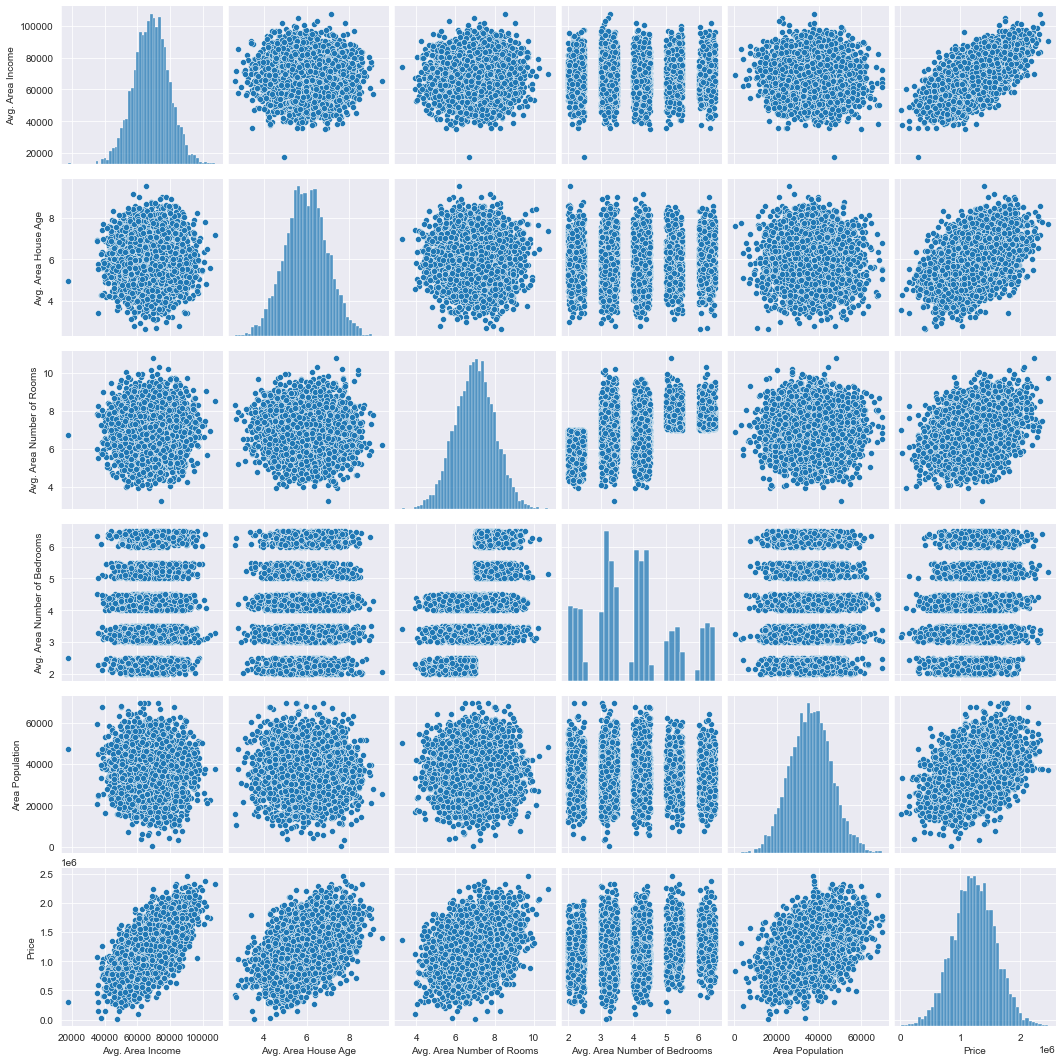

In [6]:
#Doing a quick pairplot help us get a general understanding of the distribution and relationship in the dataset
# sns.pairplot(data)

sns.pairplot(housing_data)
plt.show()

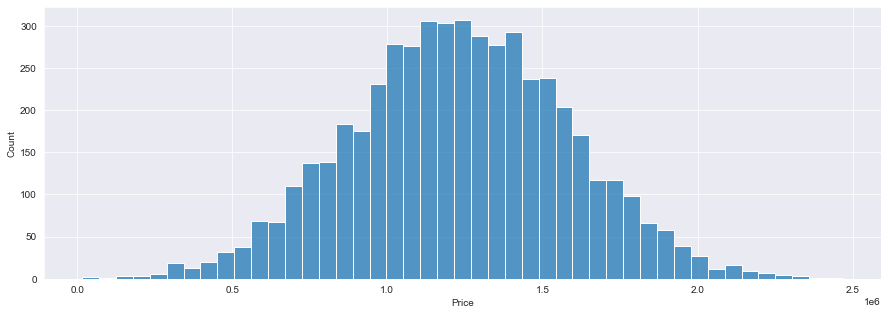

count    5.000000e+03
mean     1.232073e+06
std      3.531176e+05
min      1.593866e+04
25%      9.975771e+05
50%      1.232669e+06
75%      1.471210e+06
max      2.469066e+06
Name: Price, dtype: float64


In [7]:
sns.histplot(housing_data['Price'])
plt.show()
print(housing_data['Price'].describe())

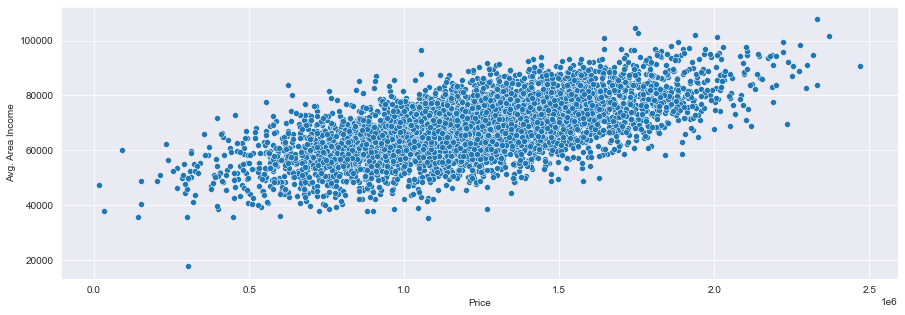

In [8]:
sns.scatterplot(x = housing_data['Price'], y = housing_data['Avg. Area Income'])
plt.show()

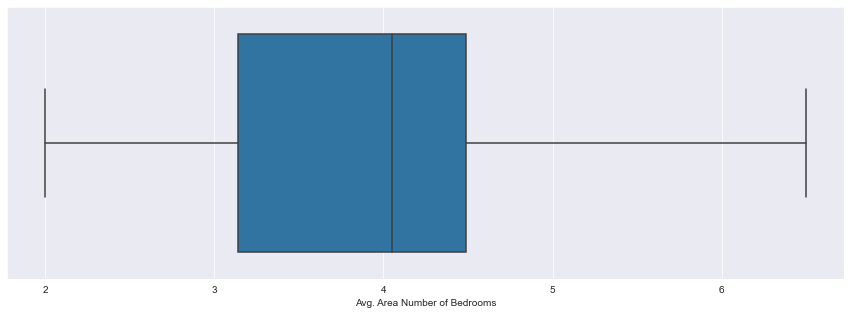

In [9]:
sns.boxplot(x = housing_data['Avg. Area Number of Bedrooms'])
plt.show()

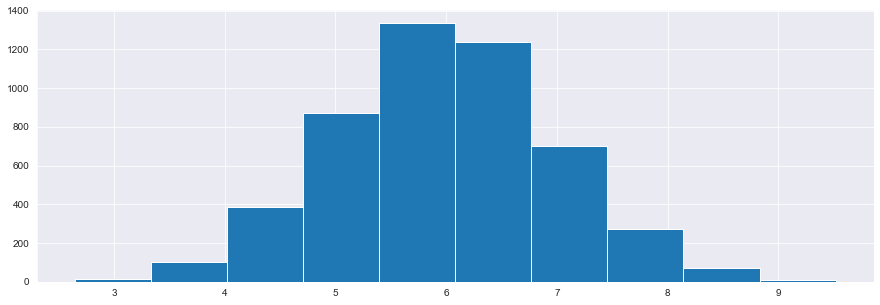

In [10]:
plt.hist(housing_data['Avg. Area House Age'])
plt.show()

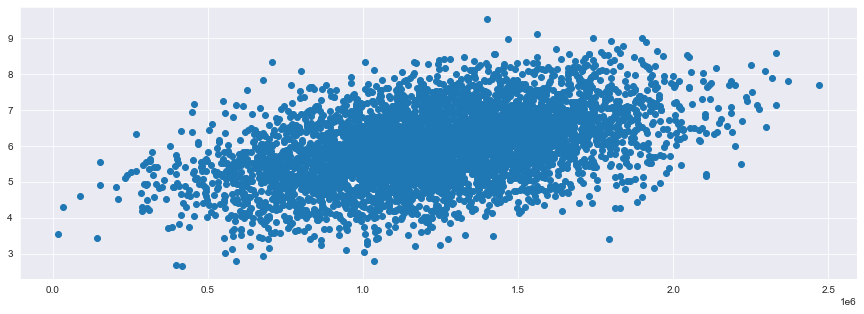

In [11]:
plt.scatter(x = housing_data['Price'], y = housing_data['Avg. Area House Age'])
#Seems like expensive house are has higher age => built longer?

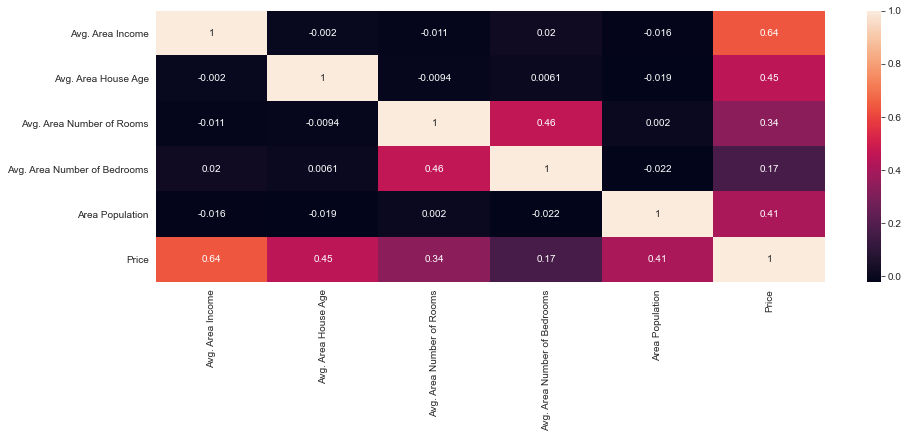

In [12]:
#Another important thing to look for is multicollinearity. Multicollinearity means that several variables are measuring the same thing
# Doing this not only have no point but can actually make our model fluctuate. Thus, we should always check for multicollinearity
# Depending on the situation, it may not be a problem, it is if it is > 0.8 between 2 variables
sns.heatmap(housing_data.corr(), annot = True)
plt.show()

In [13]:
#Creating a linear model
# Spliting train and test data set
# train_test_split(x, y, test_size (0.0 - 1.0))
import sklearn
from sklearn.model_selection import train_test_split
X = housing_data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = housing_data['Price']

X

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population  
0                             4.09     23086.800503  
1                             3.09     40173.072174  
2                             5.13     36882.159400  
3                             3.26     34310.242831  
4                             4.23     26354.109472  
...                            ...              ...  
4995                          3.46     22837.361035  
4996                          4.02     25616.115489  
4997                          2.13     33266.145490  
4998                          5.44     42625.620156  
4999                          4.07     46501.283803  

[5000 rows x 5 columns]

In [14]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [15]:
#To train with sklearn's LinearRegression model, use
# fit(train_data, train_data_labels)
#To use the model for predictions, use
# predict(test_data)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm)

LinearRegression()


In [16]:
# or use
lm_test = LinearRegression().fit(X_train, y_train)
print(lm_test)

LinearRegression()


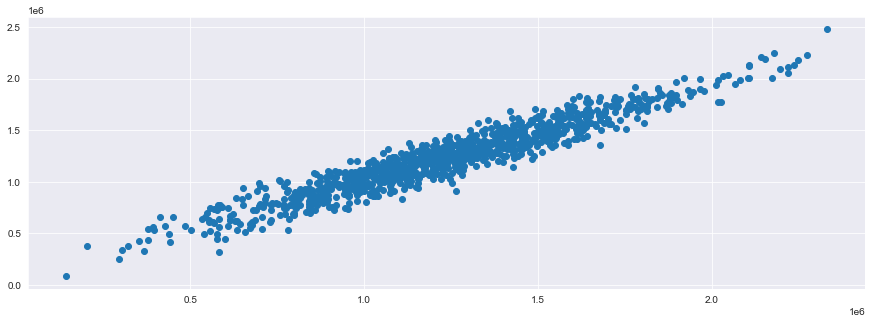

In [17]:
# To check how our model perform, we can check with the test data and test labels

predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)
plt.show()

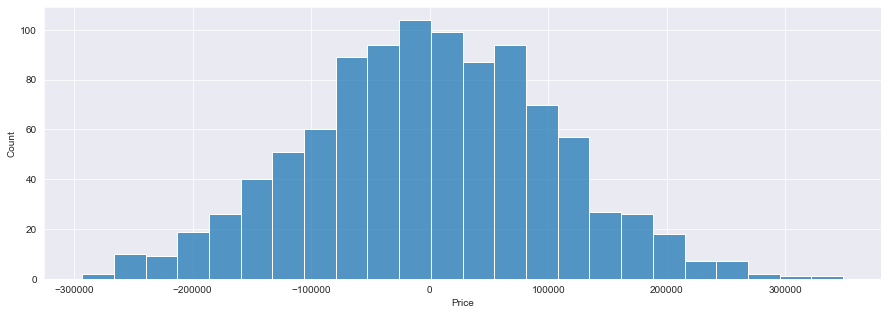

In [18]:
# Check for residuals
residuals = y_test - predictions
sns.histplot(residuals)
plt.show()

In [19]:
# 3 most common evaluation metrics for regression model:
# Mean Absolute Error (MAE) is the mean of the absolute value of the errors - easiest to understand as the average error
# Mean Squared Error (MSE) is the mean of the squared errors - 2nd most popular cause MSE punishes large error, which is useful in real world
# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors - most popular out of 3 cause RMSE is interpretable in the 'y' units 

#Using metric to evaluate model
from sklearn import metrics

print('MAE: ', metrics.mean_absolute_error(y_test, predictions))
print('MSE: ', metrics.mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE:  82932.94571725138
MSE:  10736115247.352505
RMSE:  103615.22690875364


In [20]:
#Another value we look at is the coefficient of determination (R^2) which is the percentage of variation in y explained by 
# all the x variables together. Usually R^2 of 0.70 is considered good

from sklearn.metrics import r2_score
print('R2 score: ', r2_score(y_test, predictions))

R2 score:  0.9164549405476008


In [21]:
#Finally, we can interpret our model coefficients by calling coef_ on our linear model (we can also use intercept_ for intercept)

coeff_df = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficient']) #We put it in dataframe for better visual
coeff_df

#Explanation:
# Holding all other features fixed, a 1 unit increase in Avg. Area Income is associated with an increase of $21.595 in Price
# Holding all other features fixed, a 1 unit increase in Avg. Area House Age is associated iwth an increase of $165538.4 in Price
# etc

Coefficient
Avg. Area Income                  21.595390
Avg. Area House Age           165538.414196
Avg. Area Number of Rooms     121946.471510
Avg. Area Number of Bedrooms     506.128418
Area Population                   15.302211